In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pprint
import keras

## Hello World - Neural Networks

Let's study the MINST Dataset, in this notebook we will:

1. Load the dataset
2. Explore it 
3. Understand how a computer "see" images
4. Normalize data
5. Use the image representation to learn classifiers

**1. Load the dataset**

In [2]:
from keras.datasets import mnist

In [3]:
digits = mnist.load_data()
(train_img, train_labels), (test_img, test_labels) = mnist.load_data()

**2. Let's check out the dataset dimensions**

In [32]:
print(f' Training data dimension: {train_img.shape} , \n IMAGE, X, Y ')

 Training data dimension: (60000, 28, 28) , 
 IMAGE, X, Y 


**Now let's explore how one image looks like**

In [26]:
p_print = pprint.PrettyPrinter(indent=1, width=80,  compact=False)
images = [image for image in train_img[0:2]]

In [28]:
pprint.pprint(images[1])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

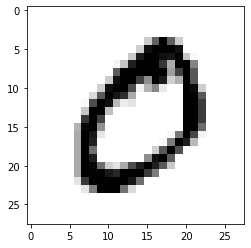

In [29]:
plt.imshow(images[1], cmap = 'binary')

**3. Understand how computer sees images: Images are multi-dimensional arrays - (image, x, y)**

**4. Preprocess the data: We want to transform the 0-255 values to be between 0-1, and set it up in ways that will help our neural network learn important features**

In [51]:
train_img = train_img.reshape((len(train_img), 28*28))
train_img = train_img.astype('float32')/255

test_img = test_img.reshape(len(test_img), 28*28)
test_img = test_img.astype('float32')/255

**5. Take the labels and convert them to categorical data**

In [57]:
labels = [label for label in test_labels[0:9]]
print(labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5]


In [58]:
from keras.utils import to_categorical 

In [59]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Let's see how the labels look now after using *to_categorical* function

In [62]:
labels_cat = [label_c for label_c in train_labels[0:2]]
print(labels_cat)

[array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]


**6. Define classifier: Neural Network**

In [64]:
from keras import models
from keras import layers

nn = models.Sequential()

# Each layer will attempt to extract most telling features of the input data

nn.add(layers.Dense(512, activation='relu', input_shape = (28*28,) ))
nn.add(layers.Dense(10, activation = 'softmax'))

# Compilation: Loss, optimizer, metric (3)
# categorical_crossentropy is the loss function that’s used as a feedback
# use of gradient descent are defined by the rmsprop

nn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


7. **Train the network** 

Before running the training step, let's recap what we have done so far:

1. Loaded the training / test data using keras.dataset
2. Explored the data dimensions and size 
3. Observed how a computer encodes the image as a matrix of numbers, where in this case was from 0-255
4. We normalized the data, so instead of having values from 0-255, now we have from 0-1 and converted it to float
5. Converted the labels to a one-hot encoding representation, where each '1' in given position represents the number
6. Defined the architecture of our NN using a fully connected two-dense layers

In [65]:
nn.fit(train_img, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4321 - accuracy: 0.8754
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1097 - accuracy: 0.9666
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0679 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0485 - accuracy: 0.9857
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0369 - accuracy: 0.9895


**8. Use the test data** 

In [67]:
test_loss, test_accuracy = nn.evaluate(test_img, test_labels)

313/313 [==============================] - 0s 588us/step - loss: 0.0680 - accuracy: 0.9795


**9. let's pick one example**

(784,) input image shape
Class:  6


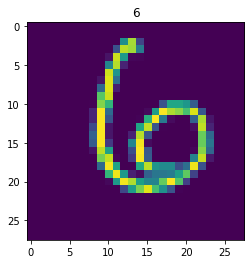

In [71]:
image_test = test_img[100]
print(image_test.shape, "input image shape")
image_class = np.argmax(nn.predict(image_test.reshape(1,784)))
print(f'Class:  {image_class}')

image_test= image_test.reshape((28,28))
plt.title(image_class)
plt.imshow(image_test)
plt.show()